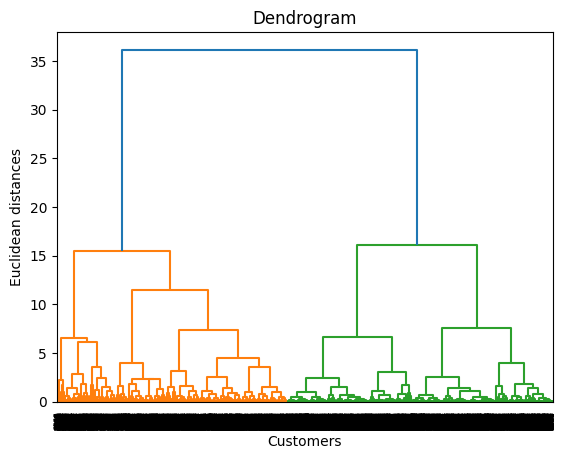

C:\Users\cfifz\AppData\Local\Temp\ipykernel_36448\1279628329.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, Silhouette_measure, 'bx-',color='green')


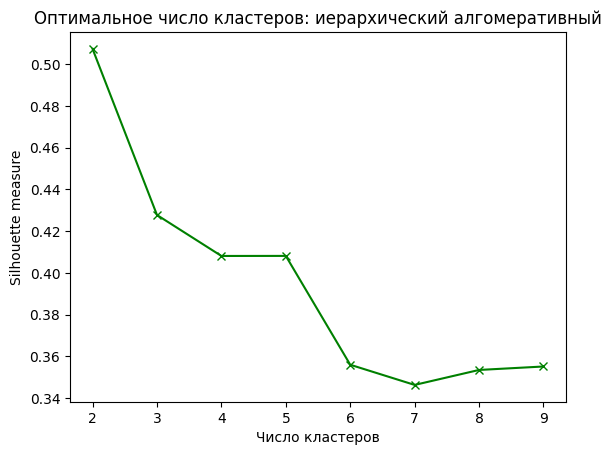

[0 0 0 ... 1 1 1]


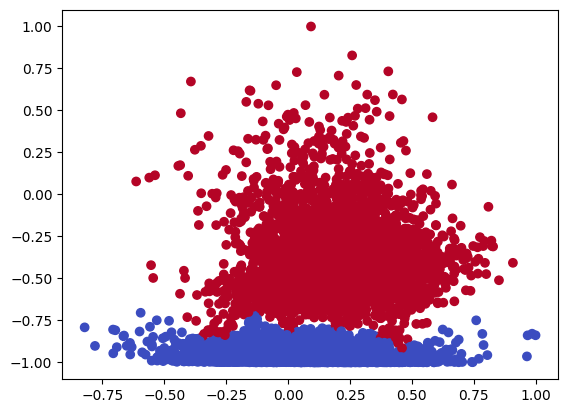

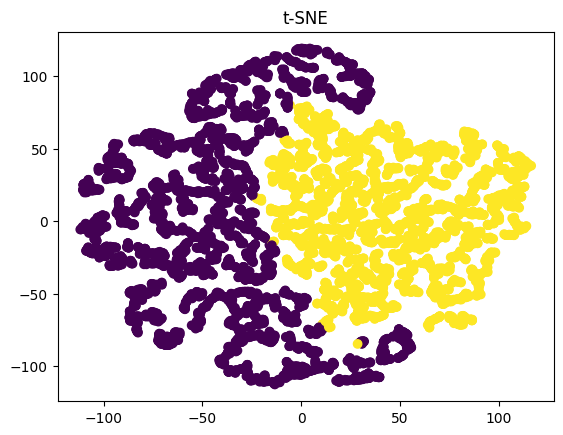

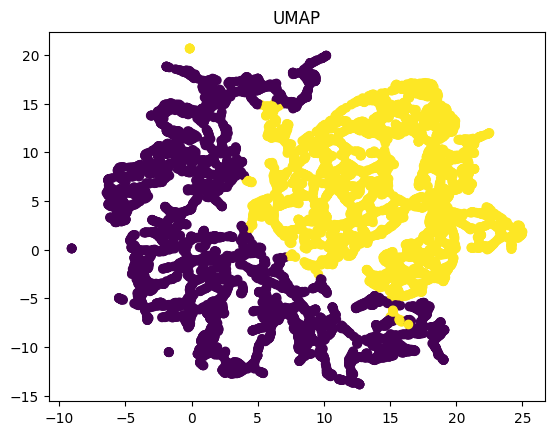

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

dataset=pd.read_csv('train.csv')
X = dataset.iloc[:, [28, 528]].values


import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Silhouette_measure = []
K = range(2, 10)
for num_clusters in K:
    hier = AgglomerativeClustering(n_clusters=num_clusters,metric='euclidean', linkage='ward')
    hier.fit_predict(X)
    Silhouette_measure.append(silhouette_score(X, hier.labels_))
plt.plot(K, Silhouette_measure, 'bx-',color='green')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette коэф')
plt.title('Оптимальное число кластеров: иерархический алгомеративный')
plt.show()

model = AgglomerativeClustering(n_clusters=2,metric='euclidean', linkage='ward')
model.fit_predict(X)
labels = model.labels_
print(labels)
plt.scatter(dataset.iloc[:, 28], dataset.iloc[:, 528], c=labels, cmap='coolwarm')
plt.show()


from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, learning_rate=200)
tsne_result = tsne.fit_transform(X)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=model.labels_, cmap='viridis')
plt.title('t-SNE')
plt.show()


import umap

umap_result = umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.3).fit_transform(X)

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=model.labels_, cmap='viridis')
plt.title('UMAP')
plt.show()